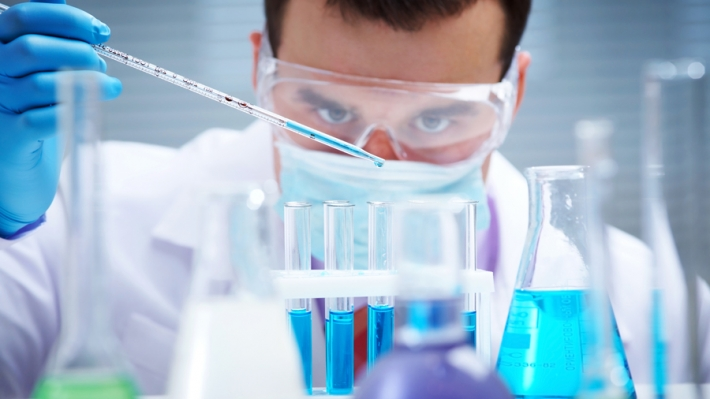

### Observations and Insights 

#1)xxxx

#2)

#3)

#4)

#5)

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

mouse_metadata_df.head()

In [ ]:
study_results_df.head()

In [29]:
# Combine the data into a single dataset

combined_dataset_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how = "outer")

# Display the data table for preview
combined_dataset_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
###############
combined_dataset_df.shape

(1893, 8)

In [31]:
# Checking the number of mice.
#combined_dataset_df["Mouse ID"].count()

len(combined_dataset_df["Mouse ID"].unique())


249

In [32]:
##############number of duplicate rows
combined_dataset_df.duplicated().sum()


1

In [33]:
##############combined_dataset_df.loc[combined_dataset_df.duplicated(), :]


In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicateDFRow = combined_dataset_df[combined_dataset_df.duplicated(["Mouse ID", "Timepoint"])]
#duplicateDFRow = combined_dataset_df[combined_dataset_df.duplicated(subset = None, keep = 'first')]

print(duplicateDFRow)
#https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
#https://appdividend.com/2020/03/07/python-pandas-find-duplicate-rows-in-dataframe-based-on-all-or-selected-columns/

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [35]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_dataset_df.loc[combined_dataset_df.duplicated(), :]

#dataschool youtube                                      
                                      
#print(duplicate_mouse)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#combined_dataset_df.drop_duplicates(keep = False).shape
#clean_combined_dataset_df = combined_dataset_df[combined_dataset_df['Mouse ID'].drop_duplicates(keep = False)]                                                                                            
clean_combined_dataset_df = combined_dataset_df.drop_duplicates() #("Mouse ID")
#clean_combined_dataset_df = combined_dataset_df.drop_duplicates()
#clean_combined_dataset_df =                                                 #df.drop_duplicates()
  #df.drop_duplicates()                                              
#clean_combined_dataset_df.head()
combined_dataset_df.head()
clean_combined_dataset_df.shape


(1892, 8)

In [37]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_dataset_df["Mouse ID"].unique())

249

In [38]:
clean_combined_dataset_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_mean = clean_combined_dataset_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_median = clean_combined_dataset_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_variance = clean_combined_dataset_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_std_dv = clean_combined_dataset_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_sem = clean_combined_dataset_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.

summary_stats_df = pd.DataFrame({"Mean": summary_mean, "Median": summary_median, "Variance": summary_variance,
                                  "Standard Deviation": summary_std_dv, "Standard Error of the Mean": summary_sem})

summary_stats_df.head(2)
#

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821


In [40]:
# help(clean_combined_dataset_df.groupby("Drug Regimen").agg)

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg_df = clean_combined_dataset_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median","var",
                                                                                                     "std", "sem"]
                                                                              }                                                                                                                                          )
summary_stats_agg_df.head()


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

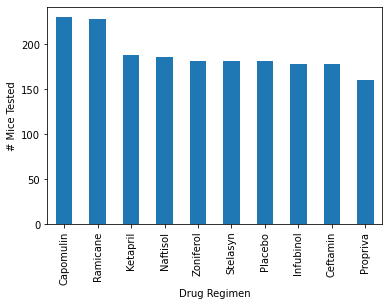

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepts = clean_combined_dataset_df["Drug Regimen"].value_counts()
timepts.plot(kind = 'bar')
###
plt.xlabel("Drug Regimen")
plt.ylabel("# Mice Tested")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

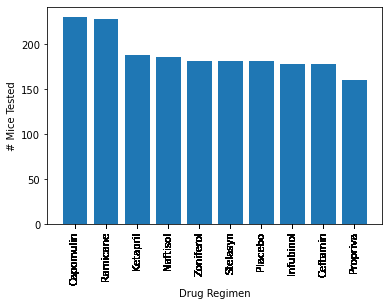

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepts = clean_combined_dataset_df["Drug Regimen"].value_counts()
plt.bar(timepts.index.values, timepts.values)
###
plt.xlabel("Drug Regimen")
plt.xticks(clean_combined_dataset_df["Drug Regimen"],rotation="vertical")
plt.ylabel("# Mice Tested")
plt.show

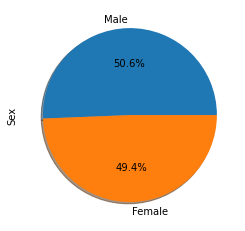

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dist = clean_combined_dataset_df.Sex.value_counts()
dist.plot(kind="pie", autopct='%1.1f%%', shadow=True)
plt.show()

([<matplotlib.patches.Wedge at 0x194c2498e80>,
 [Text(-0.02191655480551976, 1.0997816440664288, 'Males'),
  Text(0.02191645183653077, -1.0997816461183998, 'Females')],
 [Text(-0.011954484439374413, 0.5998808967635065, '50.6%'),
  Text(0.011954428274471329, -0.5998808978827634, '49.4%')])

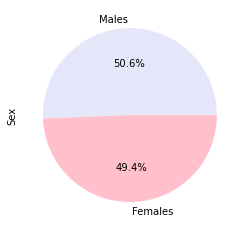

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dist = clean_combined_dataset_df.Sex.value_counts()
labels = ("Males","Females")
colors = ("Lavender","Pink")
plt.ylabel("Sex")
plt.pie(dist.values, labels = labels, colors=colors, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_tumor = clean_combined_dataset_df.groupby(["Mouse ID"])["Timepoint"].max()


# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_data_df = pd.merge(clean_combined_dataset_df, last_tumor, on=["Mouse ID", "Timepoint"], how = "right")
            

In [ ]:
#merged_data_df.count

In [48]:
 
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes   For 
for drugs in treatments:
    
    tumor_volume = merged_data_df.loc[merged_data_df["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]

    # add subset 
    tumor_vol_data.append(tumor_volume)    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    ## outlier < or > 
    outlier = tumor_volume[(tumor_volume < lower_bound) | 
    (tumor_volume > upper_bound)]
    print(f"{drugs} potential outliers: {outlier}")

    #see summary stats 3.3 3.2 

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
#tumor_vol_data

<function matplotlib.pyplot.show(*args, **kw)>

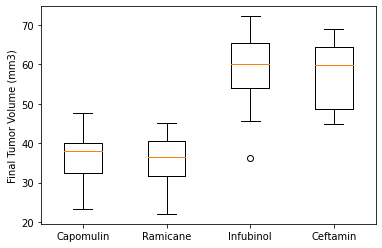

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_data, labels = treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_table_df = clean_combined_dataset_df.loc[clean_combined_dataset_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin_table_df[capomulin_table_df["Mouse ID"] == "x401"]
plt.plot(capomulin_mouse["Timepoint"],capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment - Mouse x401")
plt.show()


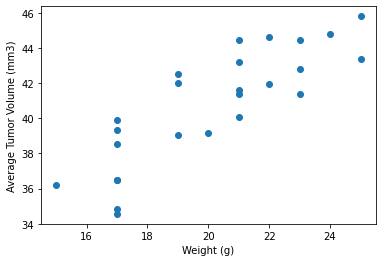

In [53]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_table = clean_combined_dataset_df[clean_combined_dataset_df["Drug Regimen"]== "Capomulin"]
capomulin_average = capomulin_table.groupby(["Mouse ID"]).mean()

#
#
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen




